In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.svm import SVR

%cd C:\Users\user\Desktop\KUL - Mstat\Modern Data Analytics\proj\

C:\Users\user\Desktop\KUL - Mstat\Modern Data Analytics\proj


In [2]:
# import data
mortality = pd.read_csv('mortality_merged.csv')

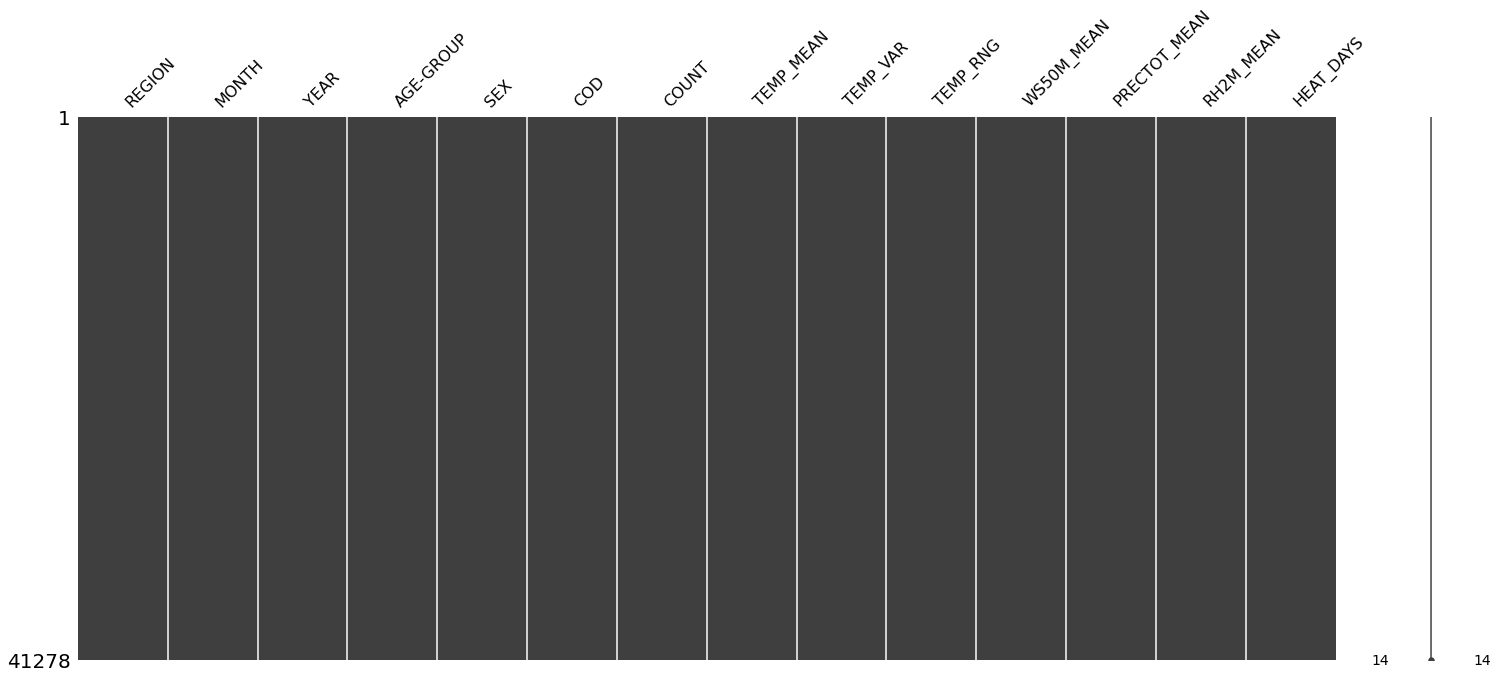

In [3]:
# Check for missing values, it seems alright
missingno.matrix(mortality)

In [4]:
# Summer period, comment it out if you want to do for the whole period
def get_summer(df):
    return df[(df['MONTH'] <= 8) & (df['MONTH'] >= 5)]
mortality = get_summer(mortality)

In [5]:
# Train-test split
TEST_SIZE = 0.1
SEED = 467051528
X_train, X_test, y_train, y_test = train_test_split(mortality.drop('COUNT', axis = 1), 
                                                    mortality['COUNT'], 
                                                    test_size = TEST_SIZE,
                                                    random_state = SEED,
                                                    shuffle = True)

In [6]:
# Preprocessing steps
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(drop = 'first')

categorical_features = ['REGION', 'AGE-GROUP', 'SEX', 'COD']
numeric_features = X_train.columns.to_list()[6:]

preprocessor = ColumnTransformer(
    transformers = [
        ('drop_columns', 'drop', ['YEAR', 'MONTH']),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [7]:
# Parameter grids
deg = np.arange(3, 8)
gamma = np.arange(0.005, 0.10, 0.005)
C = np.arange(0.0, 4.0, 0.1)
epsilon = np.arange(0.01, 0.5, 0.05)
params = {'preprocessing__num' : [StandardScaler(), RobustScaler()], 
         'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'regressor__degree': deg, 
         'regressor__gamma': gamma,
         'regressor__C': C,
         'regressor__epsilon': epsilon}

In [8]:
# Model
model = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('regressor', SVR())
])

In [9]:
# Grid search
search = RandomizedSearchCV(model, 
                            param_distributions = params, 
                            random_state = SEED)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('drop_columns',
                                                                               'drop',
                                                                               ['YEAR',
                                                                                'MONTH']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['TEMP_MEAN',
                                                                                'TEMP_VAR',
                                                                                'T

In [10]:
# Summary of grid search
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__kernel,param_regressor__gamma,param_regressor__epsilon,param_regressor__degree,param_regressor__C,param_preprocessing__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.453464,0.075360,0.850189,0.004864,sigmoid,0.09,0.11,4,2.8,RobustScaler(),"{'regressor__kernel': 'sigmoid', 'regressor__g...",-0.774204,-0.645839,-0.871772,-0.774521,-0.722168,-0.757701,0.073950,10
1,3.883510,0.008915,0.753515,0.011898,sigmoid,0.01,0.46,5,2.9,StandardScaler(),"{'regressor__kernel': 'sigmoid', 'regressor__g...",0.088374,0.072721,0.100203,0.077501,0.081788,0.084117,0.009549,7
2,4.012105,0.022044,0.722409,0.001889,rbf,0.065,0.26,3,3.6,RobustScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.306295,0.275965,0.318032,0.281745,0.294529,0.295313,0.015465,1
3,3.675963,0.016798,0.648270,0.007250,rbf,0.03,0.41,4,2.3,StandardScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.184466,0.162095,0.195826,0.169768,0.176043,0.177639,0.011692,5
4,4.119912,0.031810,0.796836,0.004636,sigmoid,0.03,0.21,3,0.4,StandardScaler(),"{'regressor__kernel': 'sigmoid', 'regressor__g...",0.012155,0.002304,0.021813,0.009470,0.010307,0.011210,0.006269,8
5,4.082918,0.023223,0.770668,0.002946,poly,0.055,0.46,6,1.9,RobustScaler(),"{'regressor__kernel': 'poly', 'regressor__gamm...",-0.124180,-0.118403,-0.117874,-0.111755,-0.114554,-0.117353,0.004175,9
6,4.051503,0.011960,0.747310,0.005066,rbf,0.045,0.11,5,2,RobustScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.219594,0.193849,0.230819,0.200362,0.210962,0.211117,0.013220,4
7,4.121494,0.034961,0.761784,0.002641,rbf,0.015,0.01,7,2.3,RobustScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.151855,0.132814,0.164481,0.137804,0.144510,0.146293,0.011124,6
8,3.960069,0.056757,0.682498,0.006320,rbf,0.085,0.06,7,3,StandardScaler(),"{'regressor__kernel': 'rbf', 'regressor__gamma...",0.253858,0.228573,0.266955,0.240359,0.247586,0.247466,0.012870,3
9,3.894787,0.050436,0.628145,0.004118,linear,0.025,0.11,4,2,StandardScaler(),"{'regressor__kernel': 'linear', 'regressor__ga...",0.274061,0.242180,0.286575,0.242962,0.260570,0.261270,0.017344,2


In [11]:
# Best fitted scores
print(search.best_params_)
print('Best scores: ', search.best_score_)

{'regressor__kernel': 'rbf', 'regressor__gamma': 0.065, 'regressor__epsilon': 0.26, 'regressor__degree': 3, 'regressor__C': 3.6, 'preprocessing__num': RobustScaler()}
Best scores:  0.29531333887924005


In [12]:
# Test performance
model_chosen = search.best_estimator_
y_pred = model_chosen.predict(X_test)

In [13]:
# Test loss
mean_squared_error(y_pred, y_test)

1512.2586642574622

In [14]:
# Training loss
mean_squared_error(y_train, model_chosen.predict(X_train))

1326.3505086333776

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


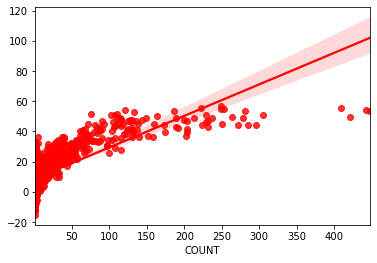

In [15]:
# Test data: y_test, y_pred
sns.regplot(y_test, y_pred, color = 'red')

In [16]:
# R-squared between y_pred and y_test
np.corrcoef(y_test, y_pred)

array([[1.        , 0.75568711],
       [0.75568711, 1.        ]])

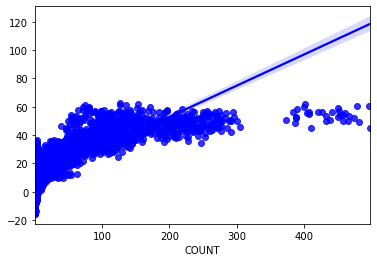

In [17]:
# Training data: y_test, y_pred_train
y_pred_train = model_chosen.predict(X_train)
sns.regplot(x = y_train, y = y_pred_train, color = 'blue')

In [18]:
# R-squared between y_pred and y_pred_train
np.corrcoef(y_train, y_pred_train)

array([[1.        , 0.75329129],
       [0.75329129, 1.        ]])